<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week11_KTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import library**

In [ ]:
import cv2
import os

**3. Add localization dataset**

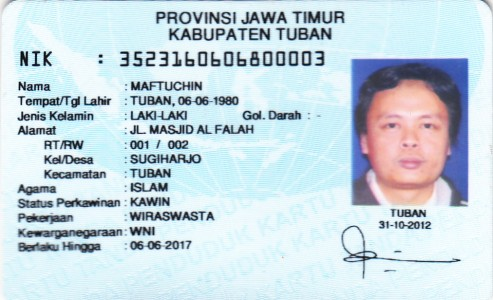

In [ ]:
from google.colab.patches import cv2_imshow

# Path to the image file
img_path = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png'

# Load the image
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is None:
    print("Error: Image not loaded.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display or save the processed image (if needed)
    cv2_imshow(img)
    cv2.destroyAllWindows()

**4. Perform Gaussian Blur**

In [ ]:
# Apply Gaussian Blur to reduce noise
for i in range(10):
 blurred = cv2.GaussianBlur(gray, (5, 5), 0.5)

**5. Greyscale convert and thresholding**

165.0 (300, 493)


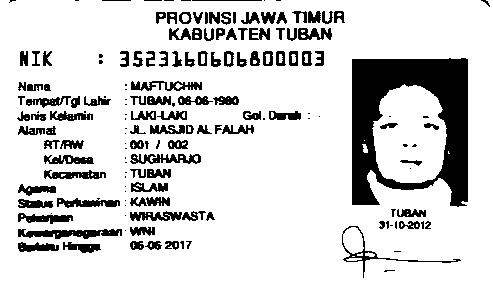

In [ ]:
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

**6. Apply morfology**

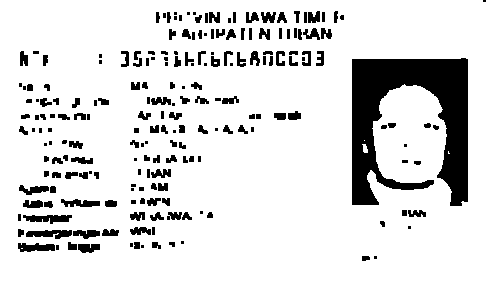

In [ ]:
import numpy as np

# Apply morphological operations (dilation followed by erosion)
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

cv2_imshow(morph_image)

**7. Apply contour extraction to get all the contours of each character/object.
Contours should be selected based on the size and ratio of a character. The characters/objects in in this KTP vary in size and ratio, so each character/object needs to be handled differently. handled differently. The example in this exercise focuses on characters that are the same size as the with NIK. If the contour extraction results show other results, i.e. other characters are detected, it is normal because it needs better code optimization and preprocessing (because the acquisition result of each image may be different).
(because the acquisition result of each image may be different)**

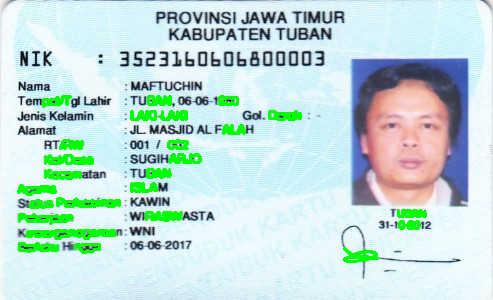

In [27]:
# Import library OpenCV
import cv2
import numpy as np

# Baca citra KTP
img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Ambangkan citra untuk mendapatkan foreground
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

# Lakukan ekstraksi kontur
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Buat list kosong untuk menyimpan kontur NIK
nik_contours = []

# Iterasi semua kontur
for cnt in contours:

  # Hitung luas dan rasio kontur
  area = cv2.contourArea(cnt)
  x,y,w,h = cv2.boundingRect(cnt)
  ratio = w / float(h)

  # Jika luas dan rasio sesuai NIK, masukkan ke list
  if area > 50 and ratio > 2 and ratio < 10:
    nik_contours.append(cnt)

# Gambar kontur NIK di atas citra asli
result = img.copy()
cv2.drawContours(result, nik_contours, -1, (0,255,0), 2)

cv2_imshow(result)